# Logistic Regression

Logistics Regression can be used for
- Binary Classification
- Multi-class Classification

### Assumptions:
- The dependent variable must be categorical in nature
- The independent variable (features)must be independent
- There should be no outliers in data 
- There should be no high correlation among the independent variables.This can be checked using correlation matrix.

In [16]:
#import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

In [2]:
#import the data
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
#preprocess the data
#remove the deck column
df.drop(columns='deck', inplace=True)
#impute missing values of age nd fare column
df['age'].fillna(df['age'].median(),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)
#impute missing values of embarked and embarked town
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
#encode the categorical variables using for loop where the object and category data type are given
for col in df.columns:
    if df[col].dtype=='object' or df[col].dtype.name=='category':
        df[col]=LabelEncoder().fit_transform(df[col])

df.head()





,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,0,2,1,True,0,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,0,2,2,False,0,1,True
3,1,1,0,35.0,1,0,53.1000,0,0,2,False,0,1,False
4,0,3,1,35.0,0,0,8.0500,0,2,1,True,0,0,True


In [8]:
#X and y columns
X=df.drop('survived',axis=1) #idhr survived ka column nikal kr baki sb x mein rakh diye
y=df['survived']

In [9]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
#call the model
model=LogisticRegression()

In [11]:
#train the model
model.fit(X_train,y_train)

c:\Users\Zain Comp\.conda\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
#prdict the values
y_pred=model.predict(X_test)

In [17]:
#Evaluate the model
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('classification_report:\n',classification_report(y_test,y_pred))



accuracy_score: 1.0
confusion_matrix:
 [[110   0]
 [  0  69]]
f1_score: 1.0
recall_score: 1.0
precision_score: 1.0
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(50.722222222222214, 0.5, 'Actual')

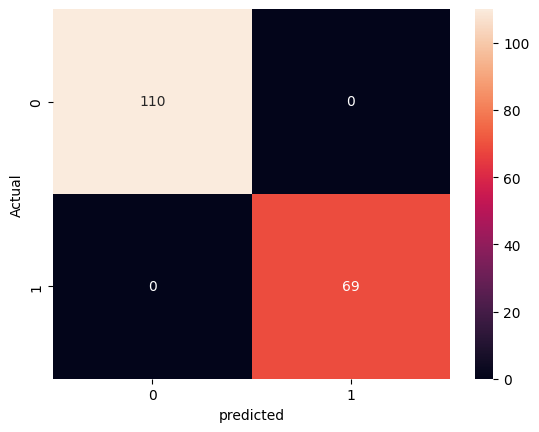

In [20]:
#plot the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Actual')

In [21]:
#Save the model
import pickle
pickle.dump(model,open('./Saved Models/02_model_Logistic_Regression.pkl','wb'))